# Extraction

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/df_limpo.csv")
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [21]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

# Treatment

In [23]:
#Eliminar columnas innecesarias
df = df.drop(columns=["customerID"])

In [24]:
#Nuevo dataFrame para trabajar sobre él
df_clean =  df.copy()

In [25]:
#Listado de columnas a arreglar
cols_to_fix = [
    "internet.OnlineSecurity", "internet.OnlineBackup", "internet.DeviceProtection",
    "internet.TechSupport", "internet.StreamingTV", "internet.StreamingMovies"
    ]

In [26]:
#Para completar con No los servicios que derivan del internet
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace("No internet service", "No")

# Encoding

In [27]:
#Lista de variables categóricas
columnas_categoricas = df_clean.select_dtypes(include="object").columns
print(columnas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [28]:
df_encoded = pd.get_dummies(df_clean, columns=columnas_categoricas, drop_first=True)
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [30]:
#Existen valores nulos?
df_encoded.isnull().sum()

customer.SeniorCitizen                            0
customer.tenure                                   0
Total.Day                                        11
account.Charges.Monthly                           0
account.Charges.Total                            11
Churn_Yes                                         0
customer.gender_Male                              0
customer.Partner_Yes                              0
customer.Dependents_Yes                           0
phone.PhoneService_Yes                            0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_Yes                     0
internet.TechSupport_Yes                          0
internet.StreamingTV_Yes                          0
internet.Str

In [31]:
print(df_encoded[["Total.Day", "account.Charges.Total"]].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [32]:
#Eliminar valores nulos
df_encoded = df_encoded.dropna(subset=["Total.Day", "account.Charges.Total"])

In [33]:
df_encoded.isnull().sum()

customer.SeniorCitizen                           0
customer.tenure                                  0
Total.Day                                        0
account.Charges.Monthly                          0
account.Charges.Total                            0
Churn_Yes                                        0
customer.gender_Male                             0
customer.Partner_Yes                             0
customer.Dependents_Yes                          0
phone.PhoneService_Yes                           0
phone.MultipleLines_No phone service             0
phone.MultipleLines_Yes                          0
internet.InternetService_Fiber optic             0
internet.InternetService_No                      0
internet.OnlineSecurity_Yes                      0
internet.OnlineBackup_Yes                        0
internet.DeviceProtection_Yes                    0
internet.TechSupport_Yes                         0
internet.StreamingTV_Yes                         0
internet.StreamingMovies_Yes   

# Correlation

In [34]:
#Creamos una variable de la correlación de las columnas
corr = df_encoded.corr()

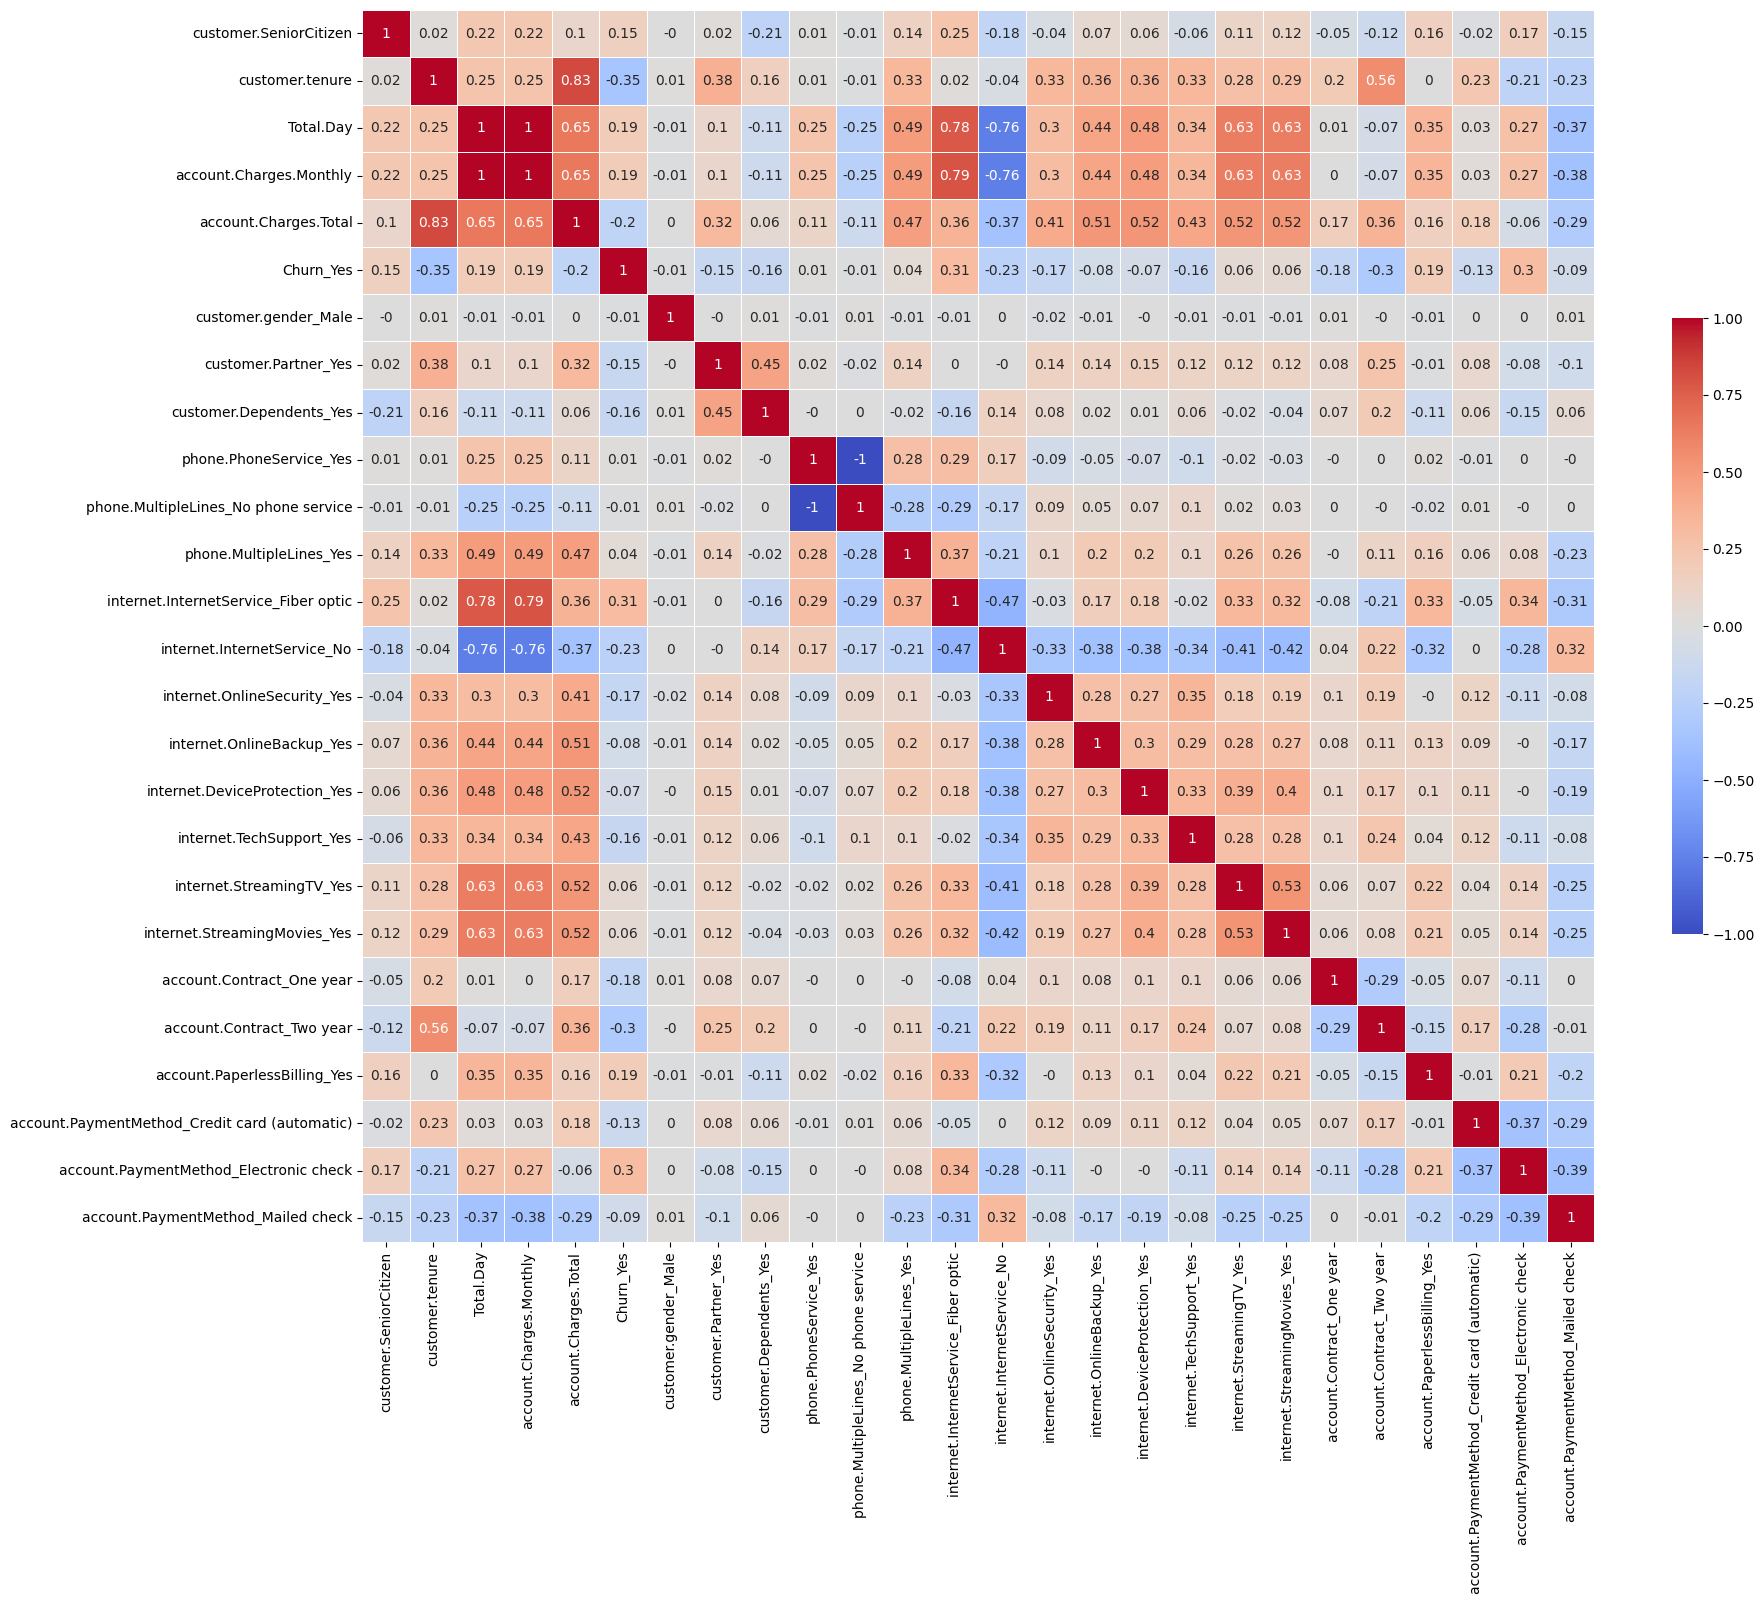

In [35]:
#Graficamos la correlación
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr,2), vmax=1, vmin=-1, center=0, cmap="coolwarm",
                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

# Nivelation

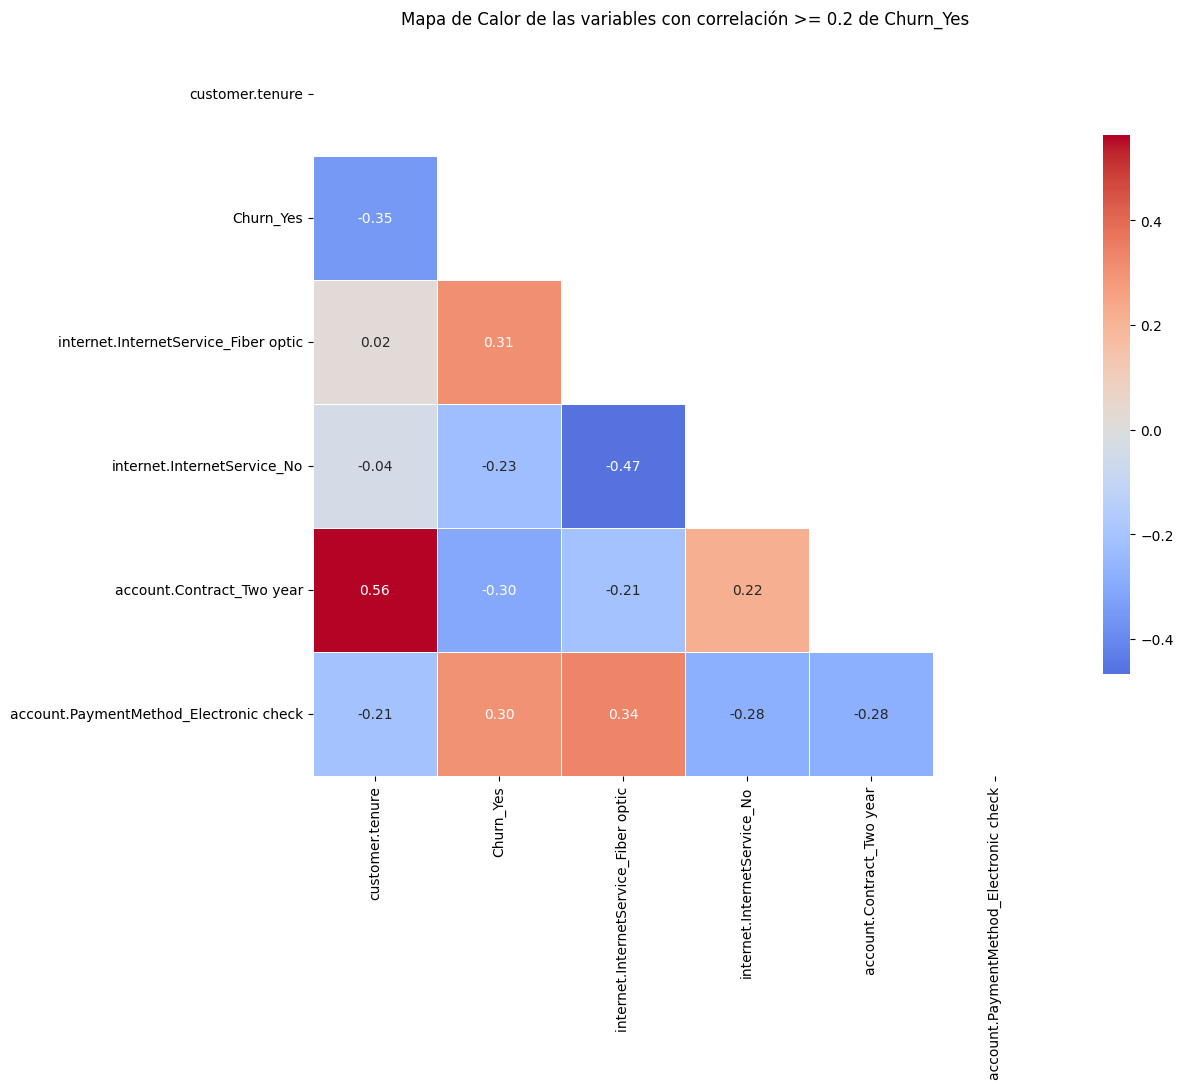

In [36]:
#Definir la variable objetivo
target_var = "Churn_Yes"

#Definir y delimitar mínimo de correlación absoluta para la selección
limit = 0.2

#Filtrar variables que tengan correlación absoluta >= límite de la variable objetivo
#Para crear una lista de variables relevantes
variables_relevant = corr.index[abs(corr[target_var]) >= limit].tolist()

#Garantizar que la variable objetivo esté en la lista.  #Adicionar
if target_var not in variables_relevant:
    variables_relevant.append(target_var)

#Crear una matriz de correlación solamente con las variables relevantes
corr_filtered = corr.loc[variables_relevant, variables_relevant]

#Generar una máscara para esconder el triángulo superior de la matriz (incluida la diagonal)
mask = np.triu(np.ones_like(corr_filtered, dtype=bool))

#Generar un mapa de calor con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtered,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mask
)
plt.title(f"Mapa de Calor de las variables con correlación >= {limit} de {target_var}")
plt.show()


# Escability

In [37]:
from sklearn.preprocessing import StandardScaler

#Hacer una copia del df encoded
df_scaled = df_encoded.copy()

#Identificar columnas numéricas a escalar
numerical_cols = ["customer.tenure","Total.Day","account.Charges.Monthly","account.Charges.Total"]

#Incializar el escalar
scaler = StandardScaler()

#Aplicar el escalador a columnas numéricas
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

#Muestra las primeras filas del dataframe escalado
df_scaled.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,-0.954296,0.039876,0.026652,-0.745607,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,-0.954296,-0.148964,-0.162819,-0.768063,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,-1.158016,0.179021,0.302548,-0.883456,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,-0.791321,1.003951,1.103642,-0.461240,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,-1.198760,0.805173,0.634952,-0.889390,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# Multicollinearity analysis

In [38]:
#Importar librerías 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
X = df_encoded.drop(columns=["Churn_Yes"])

In [40]:
X_const = add_constant(X)

In [41]:
X_const = X_const.astype(float)

#Calcular VIF Variance Inflation Factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values,i) for i in range(X_const.shape[1])]

#Mostrar resultados
display(vif_data.sort_values(by="VIF", ascending=False))

d:\Program Files\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [42]:
#Con escalado
X_ = df_scaled.drop(columns=["Churn_Yes"])
X_const_ = add_constant(X_)
X_const_ = X_const_.astype(float)

#Calcular VIF Variance Inflation Factor
vif_data_ = pd.DataFrame()
vif_data_["feature"] = X_const_.columns
vif_data_["VIF"] = [variance_inflation_factor(X_const_.values,i) for i in range(X_const_.shape[1])]

#Mostrar resultados
display(vif_data_.sort_values(by="VIF", ascending=False))


d:\Program Files\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.607999
12,internet.InternetService_Fiber optic,148.496978
3,Total.Day,133.791382
13,internet.InternetService_No,104.215464
19,internet.StreamingMovies_Yes,24.156512
18,internet.StreamingTV_Yes,24.077628
5,account.Charges.Total,10.871112
2,customer.tenure,7.610767


# Less Multicollinearity

In [43]:
#Importar librerías
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#Para no modificar el X original
X_filtered = X_const.copy()

#Remover varibales con multicolinearidad infinita
cols_to_drop = [
    "phone.PhoneService_Yes",   #Alta colinearidad con múltiples líneas
    "phone.MultipleLines_No phone service"    #"Redundante con asusencia de teléfono"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

#Remover redudancias fuerte entre las variables numéricas
#Si "Total.Day" y "Charges.Total" son derivados de "Monthly" y "tenure", mantenemos solo uno
X_filtered.drop(columns=["Total.Day"], inplace=True)

#Remover redudancias dummies de la misma variable categóricas
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

#Garantizar que los datos estén en float para que VIF funcione
X_filtered = X_filtered.astype(float)

#Recalcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values,i) for i in range(X_filtered.shape[1])]

#Mostrar los resultados
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [45]:
#Quitar Charges.Total que depende de account.Charges.Monthly y customer.tenure
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)

In [46]:
# RECALCULAR VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values,i) for i in range(X_filtered.shape[1])]

#Mostrar los resultados
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


# Modelos Predictivos

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [59]:
X = df_encoded.drop(columns=["Churn_Yes"])
y = df_encoded["Churn_Yes"]

In [60]:
#Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=16, stratify=y 
)

In [61]:
#Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Usando underSampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=16)
X_train_bal_rus, y_train_bal_rus = rus.fit_resample(X_train, y_train)

In [70]:
#Balanceamiento
smote = SMOTE(random_state=16)
#X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train) 
X_train_bal, y_train_bal = smote.fit_resample(X_train_bal_rus, y_train_bal_rus) 

In [71]:
#Modelo Regresión Logística
logis_reg = LogisticRegression(random_state=16)
logis_reg.fit(X_train_bal, y_train_bal)

#Predicción
#y_pred_lr = logis_reg.predict(X_test_scaled)
#y_prob_lr = logis_reg.predict_proba(X_test_scaled)[:,1]
y_pred_lr = logis_reg.predict(X_test)
y_prob_lr = logis_reg.predict_proba(X_test)[:,1]

#Evaluación
print("Regresión Logística")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("ROC AUC: ", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión: ", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Accuracy:  0.7483412322274882
ROC AUC:  0.834664190225653
Matriz de Confusión:  [[1146  403]
 [ 128  433]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81      1549
        True       0.52      0.77      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



d:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Modelo Random Forest
ran_forest = RandomForestClassifier(random_state=16)
ran_forest.fit(X_train_bal, y_train_bal)

#Predicción
#y_pred_rf = ran_forest.predict(X_test_scaled)
#y_prob_rf = ran_forest.predict_proba(X_test_scaled)[:,1]
y_pred_rf = ran_forest.predict(X_test)
y_prob_rf = ran_forest.predict_proba(X_test)[:,1]

#Evaluación
print("Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("ROC AUC: ", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión: ", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy:  0.747867298578199
ROC AUC:  0.8268016050836087
Matriz de Confusión:  [[1154  395]
 [ 137  424]]
              precision    recall  f1-score   support

       False       0.89      0.74      0.81      1549
        True       0.52      0.76      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



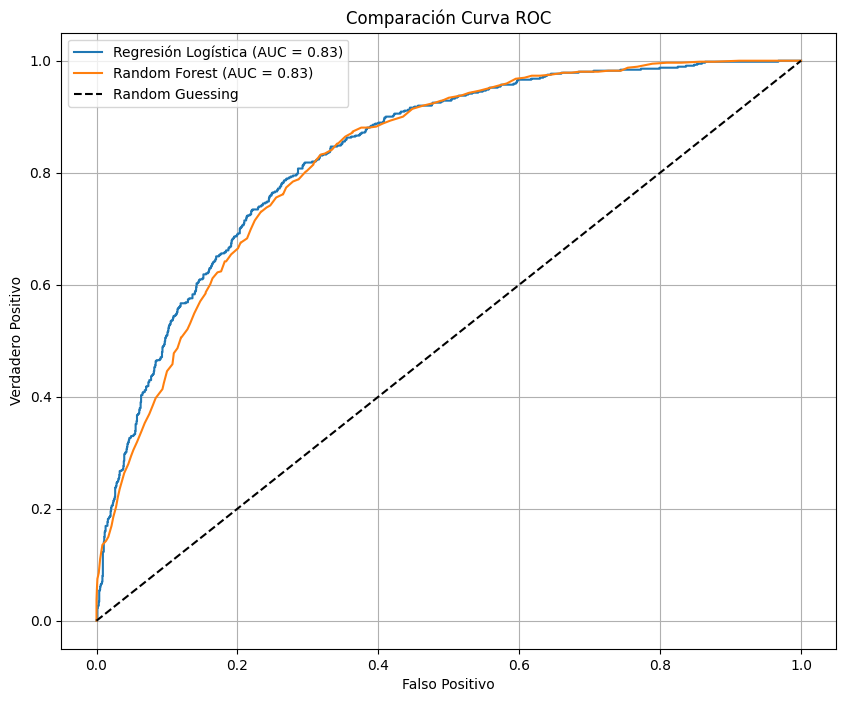

In [73]:
#Generar gráfico para analizar ambos modelos
from sklearn.metrics import roc_curve

#Calcular ROC Curve para LogisticRegression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

#Calcular ROC Curve para RandomForest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

#Plot ROC Curve
plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1],[0,1], "k--", label= "Random Guessing")  #Línea Diagonal random
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadero Positivo")
plt.title("Comparación Curva ROC")
plt.legend()
plt.grid(True)
plt.show()




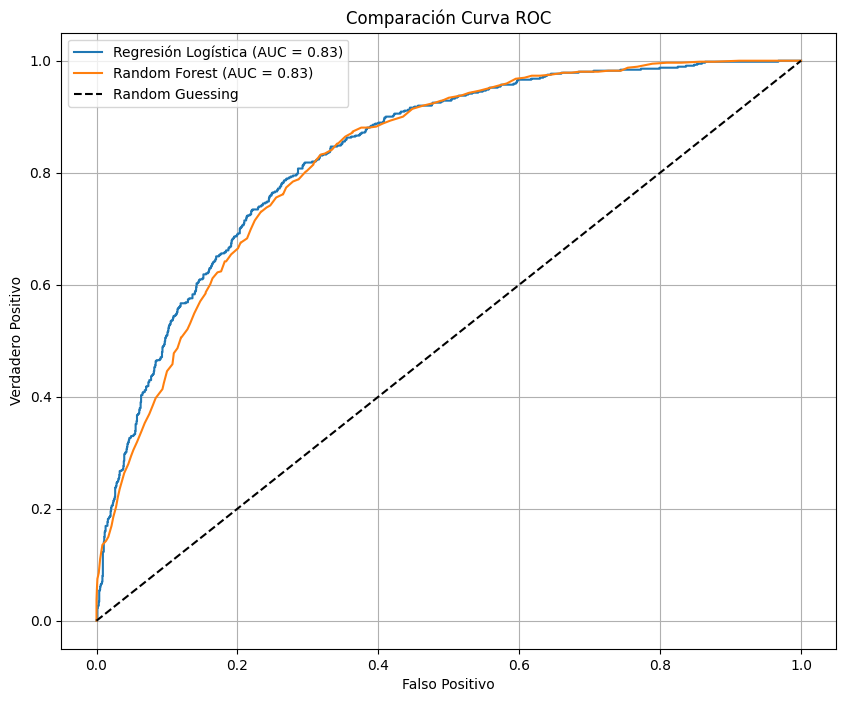

In [74]:
#Generar gráfico para analizar ambos modelos
from sklearn.metrics import roc_curve

#Calcular ROC Curve para LogisticRegression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

#Calcular ROC Curve para RandomForest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

#Plot ROC Curve
plt.figure(figsize=(10,8))
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0,1],[0,1], "k--", label= "Random Guessing")  #Línea Diagonal random
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadero Positivo")
plt.title("Comparación Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

# Selección de Modelo


La falta de un adecuado balanceo de las variables no nos permite escoger con claridad el modelo Champion por mucho, pero con las estadísticas y consideraciones tomadas en cuenta en el ejercicio el modelo seleccionado será Random Forest al haber alcanzado el mayor valo de Precisión  y del cual nos podemos guiar para nuestros futuros datos de entrada con un modelo medianamente confiable.

Igual queda la recomendación, de mejorar el balanceo así como probar con una mayor cantidad de modelos para afinar en un futuro esta decisión